# Table of Contents
* [make gifs](#make-gifs)


In [17]:
%%capture
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
from collections import Counter, defaultdict
%load_ext autoreload
%autoreload

from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import functools
import math
from collections import Counter, defaultdict
%load_ext autoreload
%autoreload 2

import copy
import os
import json
from tqdm import tqdm as tqdm

from IPython.display import Image
import PIL.Image as pil
import random
import cv2
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pylab as plt
#%matplotlib notebook
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light solarized
# %base16_mplrc dark solarized
plt.rcParams['grid.linewidth'] = 0
plt.rcParams['figure.figsize'] = (16.0, 10.0)

from anigen_tools.dataset import FlintstonesDataset
from anigen_tools.mturk import unpickle_this, pickle_this
from anigen_tools.trajectory_viz import filter_chars, filter_description
from anigen_tools.trajectory_viz import avg_video_appearance
from anigen_tools.trajectory_viz import draw_trajectory_set
from anigen_tools.trajectory_viz import vid_filter

In [18]:
import pickle

In [19]:
from anigen_tools.mturk import unpickle_this
from anigen_tools.docs import doc_video_group
from anigen_tools.segmentation import segment_all_video_entities
from anigen_tools.hybrid_segmentation import draw_video_segmentations
from anigen_tools.tracking import draw_video_tracking

In [18]:
import os

from paramiko import SSHClient
from scp import SCPClient

import paramiko

from scp import SCPClient

In [6]:
# sample_ds = unpickle_this('sample_ds_100.pkl')

In [8]:
# with open('../build_dataset/ds_v3p0.pkl', 'rb') as f:
#     complete_ds = pickle.load(f)

In [ ]:
from tqdm import tqdm

In [9]:
def get_remote_file(remote_dir, name):
    ssh = SSHClient()
    ssh.load_system_host_keys()
    ssh.connect("ec2-54-218-100-182.us-west-2.compute.amazonaws.com", username="ubuntu", key_filename="/Users/schwenk/dustins_crap/wgmm/long_term_store/inter/dustins-dev.pem")
    scp = SCPClient(ssh.get_transport(), sanitize=lambda x: x)
    scp.get(os.path.join(remote_dir, name + "*"), os.path.join('retrieved', remote_dir))

In [6]:
segmentation_dir = 'trajectories/segmentation/'

In [7]:
interp_dir = 'trajectories/interpolation/'
tracking_dir = 'trajectories/tracking/'
frame_dir = 'trajectories/frame_arr_data/'
remote_dirs = [interp_dir, tracking_dir, frame_dir]

In [8]:
cutout_dir = 'trajectories/cutout'

In [14]:
# for vid in sample_ids:
#     for rd in remote_dirs:
#         get_remote_file(rd, vid)

In [52]:
for vid in sample_ids:
    get_remote_file(segmentation_dir, vid)

In [186]:
for vid in sample_ids:
    get_remote_file(cutout_dir, vid)

In [39]:
segment_all_video_entities(pvid, True)

In [19]:
draw_video_segmentations(sample_vids_all[0], True)

# make gifs

In [408]:
# = unpickle_this('../build_dataset/complete_ds_v3p0.pkl')

In [409]:
# vids_of_interest = [v for v in complete_ds if 'vase' in v.description().lower()]
# vids_of_interest = [v for v in vids_of_interest if 'vase' in v.description().lower()]

In [353]:
# vids_of_interest = [v for v in complete_ds if 'living room' in v.setting().lower()]

In [389]:
draw_video_segmentations(single_vid, retrieved=False)

In [18]:
for vid in tqdm([single_vid]):
    try:
        draw_video_segmentations(vid, retrieved=False)
    except:
        print(vid.gid())

100%|██████████| 1/1 [00:00<00:00, 443.28it/s]

s_01_e_16_shot_017094_017168


In [17]:
# _ = [draw_video_tracking(vid, retrieved=True) for vid in tqdm(sample_ds)]

100%|██████████| 99/99 [00:13<00:00,  7.14it/s]


In [14]:
local_path = './retrieved/trajectories/improved_cutout/'
keyframe_postfixes = ['_f' + str(x) + '_frame.png' for x in [10, 40, 70]]
def combine_bg_images(video):
    outfile = video.gid() + '_bgfill.png'
    frame_paths = [''.join([local_path, video.gid(), pfix + '_RESULT.png']) for pfix in keyframe_postfixes]
    try:
        frame_images = [pil.open(fp) for fp in frame_paths]
    except FileNotFoundError as e:
        print(e)
        return
    combined_frames = pil.fromarray(np.hstack([np.asarray(img) for img in frame_images if img]))
    combined_frames.save('./retrieved/trajectories/viz/' + outfile)

In [63]:
# _ = [combine_bg_images(vid) for vid in sample_ds]

# convert bg imgs 

In [15]:
bg_dir = 'retrieved/trajectories/improved_cutout/'

In [16]:
bg_imgs = [f for f in os.listdir(bg_dir)]

In [17]:
all_vids = list(set([im.split('_f')[0] for im in bg_imgs]))

In [14]:
vid_bgs = {}
for vid in tqdm(all_vids):
    frame_paths = [bg_dir + vid + '_f{}_frame.png_RESULT.png'.format(fn) for fn in range(75)] 
#     vid_bgs[vid] = np.array([np.array(pil.open(fp)) for fp in frame_paths])
    vid_bgs = [pil.open(fp) for fp in frame_paths]
    outfile = 'bg_gifs/{}_fill_bg.gif'.format(vid)
    vid_bgs[0].save(outfile, save_all=True, optimize=False, duration=42, append_images=vid_bgs[1:])
    [img.close() for img in vid_bgs]

100%|██████████| 99/99 [00:17<00:00,  5.73it/s]


In [226]:
pvid = complete_ds.get_video('s_05_e_22_shot_019737_019811')

In [229]:
mvs = unpickle_this('moving_vids.pkl')

In [ ]:
def convert_png_bgs_to_npy(vid):
    bg_dir = os.path.join(traj)
    frame_paths = [ + vid.gid() + '_f{}_frame.png_RESULT.png'.format(fn) for fn in range(75)] 
    bg_array = np.array([np.array(pil.open(fp)) for fp in frame_paths])

In [16]:
# bg_arrs = [np.array(pil.open(ip)) for ip in bg_img_paths[:1]][0]

In [131]:
def write_static_bg_frame_arr_mid(video):
    bg_fill_dir = '/Users/schwenk/wrk/animation_gan/dataset/v3p0/filled_backgrounds/'
    bg_npy_dir = 'test_npz'
    bg_file_path = os.path.join(bg_fill_dir, video.gid() + '_f40.png')
    middle_frame = pil.open(bg_file_path)
    filled_out_arr =  np.tile(np.expand_dims(middle_frame, 0), [75, 1, 1, 1])
    outfile = os.path.join(bg_npy_dir, video.gid() + '_bg.npy.npz')
    np.savez_compressed(outfile, np.array(middle_frame))

In [210]:
def write_static_bg_frame_arr(video):
    frame_numbers = [10, 40, 70]
    bg_fill_dir = '/Users/schwenk/wrk/animation_gan/dataset/v3p0/filled_backgrounds/'
    bg_npy_dir = 'test_npz'
    three_file_paths = [os.path.join(bg_fill_dir, video.gid() + '_f{}.png'.format(fn)) for fn in frame_numbers]
    three_frames = [np.array(pil.open(bg)) for bg in three_file_paths]
    
    pw_combos = list(combinations(three_frames, 2))
    pw_sims = [compare_ssim(*pwc, multichannel=True) for pwc in pw_combos]

    f10_sims = sum(pw_sims[:2])
    f40_sims = sum([pw_sims[0], pw_sims[-1]])
    f70_sims = sum(pw_sims[1:])

    comp_arr = np.array([f10_sims, f40_sims, f70_sims])

    best_frame_idx = np.argmax(comp_arr)
    best_frame = three_frames[best_frame_idx]
    print(frame_numbers[best_frame_idx])
    filled_out_arr =  np.tile(np.expand_dims(best_frame, 0), [75, 1, 1, 1])
    outfile = os.path.join(bg_npy_dir, video.gid() + '_bg.npy.npz')
    np.savez_compressed(outfile, np.array(filled_out_arr))

In [213]:
test_vid = complete_ds.data[1]

In [214]:
three_test = write_static_bg_frame_arr(test_vid)

40


In [ ]:
compare_ssim(three_test[0], three_test[2], multichannel=True)

In [172]:
from itertools import combinations
from itertools import permutations

In [216]:
rec_arr = np.load('test_npz/' + test_vid.gid() + '_bg.npy.npz')['arr_0']

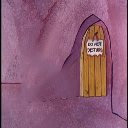

In [220]:
pil.fromarray(rec_arr[0])

# detect bg motion

In [17]:
def convert_to_rgb(bin_img):
    return pil.fromarray(np.tile(np.expand_dims(bin_img * 255, 2), [1, 1, 3]))

In [18]:
vid_labels = pd.read_csv('./sample_bg_motion_labels.csv')

In [19]:
all_ds_ids = set([v.gid() for v in complete_ds.data])

In [20]:
vid_labels = vid_labels[vid_labels['vid'].isin(all_ds_ids)]

In [21]:
all_bg_fills = '/Users/schwenk/wrk/animation_gan/dataset/v3p0/trajectories/filled_backgrounds/'

In [22]:
# vid_bgs = {}
# for vid in sample_ds[:2]:
#     frame_paths = [all_bg_fills + vid.gid() + '_f{}.png'.format(fn) for fn in [10, 40, 70]]
#     vid_bgs[vid.gid()] = [pil.open(fp) for fp in frame_paths]

In [23]:
static_ids = vid_labels[vid_labels['moving'] == 0]['vid']
moving_ids = vid_labels[vid_labels['moving'] == 1]['vid']

In [25]:
from anigen_tools.bg_fill import make_cutout
from anigen_tools.bg_fill import combine_masks

In [146]:
from skimage.measure import compare_ssim
from skimage.measure import compare_mse
from skimage.measure import compare_nrmse

In [147]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [27]:
frame_arr_dir = '/Users/schwenk/wrk/animation_gan/dataset/v3p0/trajectories/frame_arr_data/'

In [28]:
# video = video = complete_ds.get_video(static_ids.iloc[1])
# video = complete_ds.get_video(moving_ids.iloc[1])

In [233]:
# moving_bg_res = pd.Series([detect_moving_bg(complete_ds.get_video(v)) for v in moving_ids.tolist()])

In [727]:
# static_bg_res = pd.Series([detect_moving_bg(complete_ds.get_video(v)) for v in static_ids.tolist()])

In [232]:
def detect_moving_bg(video):
    frame_arr_data = np.load(os.path.join(frame_arr_dir, video.gid() + '.npy'))
    ent_masks = combine_masks(video)
    vid_cutouts = np.array([make_cutout(video, frame_arr_data, ent_masks, fn, write=False) for fn in range(75)])
    avg_cutout = np.median(vid_cutouts, axis=0).astype(np.uint8)
    similarity_to_mean = np.array([compare_ssim(vid_cutouts[fn], avg_cutout, multichannel=True) for fn in range(75)])
    return similarity_to_mean.max()


def classify_video(video, thresh=0.95):
    max_ssim = detect_moving_bg(video)
    return {video.gid: max_ssim < thresh}

In [216]:
# def detect_moving_bg(video):
#     frame_arr_data = np.load(os.path.join(frame_arr_dir, video.gid() + '.npy'))
# #     ent_masks = combine_masks(video)
# #     vid_cutouts = np.array([make_cutout(video, frame_arr_data, ent_masks, fn, write=False) for fn in range(75)])
#     avg_cutout = np.median(frame_arr_data, axis=0).astype(np.uint8)
#     similarity_to_mean = np.array([compare_ssim(frame_arr_data[fn], avg_cutout, multichannel=True) for fn in range(75)])
#     return similarity_to_mean.max()

In [136]:
# def detect_moving_bg(video):
#     frame_arr_data = np.load(os.path.join(frame_arr_dir, video.gid() + '.npy'))
#     ent_masks = combine_masks(video)
#     vid_cutouts = np.array([make_cutout(video, frame_arr_data, ent_masks, fn, write=False) for fn in range(75)])
#     avg_cutout = np.median(vid_cutouts, axis=0).astype(np.uint8)
#     demeaned = vid_cutouts - avg_cutout
# #     return demeaned.sum() / avg_cutout.sum()
# #     return similarity_to_mean.mean()    

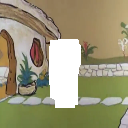

In [107]:
pil.fromarray(vid_cutouts[0]) 

In [217]:
# all_bg_res = [detect_moving_bg(complete_ds.get_video(v)) for v in tqdm(vid_labels['vid'])]
all_bg_res_mse = [detect_moving_bg(complete_ds.get_video(v)) for v in tqdm(vid_labels['vid'])]

vid_labels['ssim'] = all_bg_res_mse



  0%|          | 0/97 [00:00<?, ?it/s]

  1%|          | 1/97 [00:00<00:37,  2.59it/s]

  2%|▏         | 2/97 [00:00<00:37,  2.55it/s]

  3%|▎         | 3/97 [00:01<00:36,  2.54it/s]

  4%|▍         | 4/97 [00:01<00:35,  2.59it/s]

  5%|▌         | 5/97 [00:01<00:35,  2.60it/s]

  6%|▌         | 6/97 [00:02<00:35,  2.60it/s]

  7%|▋         | 7/97 [00:02<00:34,  2.60it/s]

  8%|▊         | 8/97 [00:03<00:34,  2.59it/s]

  9%|▉         | 9/97 [00:03<00:33,  2.61it/s]

 10%|█         | 10/97 [00:03<00:33,  2.62it/s]

 11%|█▏        | 11/97 [00:04<00:32,  2.63it/s]

 12%|█▏        | 12/97 [00:04<00:32,  2.63it/s]

 13%|█▎        | 13/97 [00:04<00:31,  2.63it/s]

 14%|█▍        | 14/97 [00:05<00:31,  2.63it/s]

 15%|█▌        | 15/97 [00:05<00:31,  2.63it/s]

 16%|█▋        | 16/97 [00:06<00:30,  2.63it/s]

 18%|█▊        | 17/97 [00:06<00:30,  2.62it/s]

 19%|█▊        | 18/97 [00:06<00:30,  2.61it/s]

 20%|█▉        | 19/97 [00:07<00:29,  2.61it/s]

 21%|██        | 20/97 [00:07<00:29,

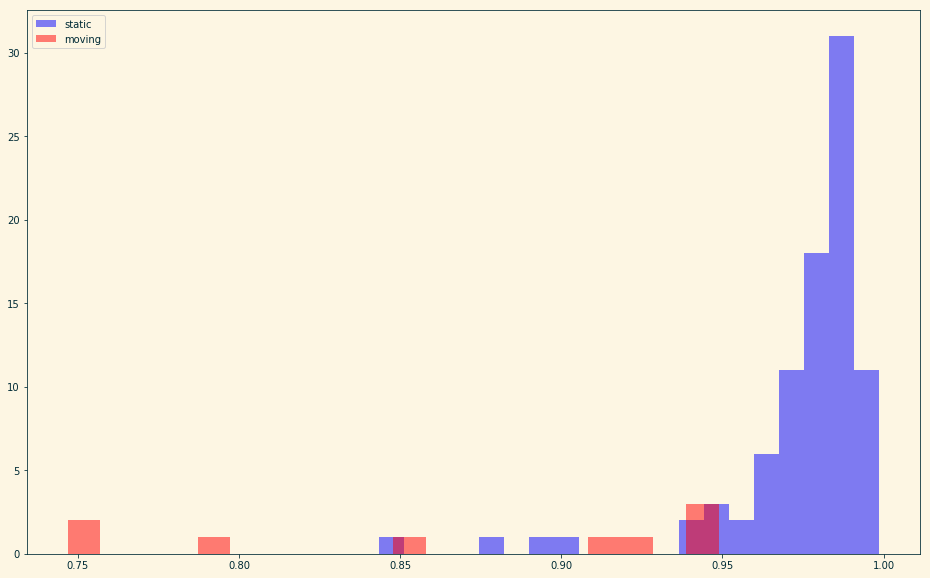

In [218]:
ax1 = plt.subplot(111)
vid_labels[vid_labels['moving']==0]['ssim'].hist(ax=ax1, color='blue', label='static', alpha=0.5, bins=20)
vid_labels[vid_labels['moving']==1]['ssim'].hist(ax=ax1, color='red', label='moving', alpha=0.5, bins=20)
_ = ax1.legend(loc='best')

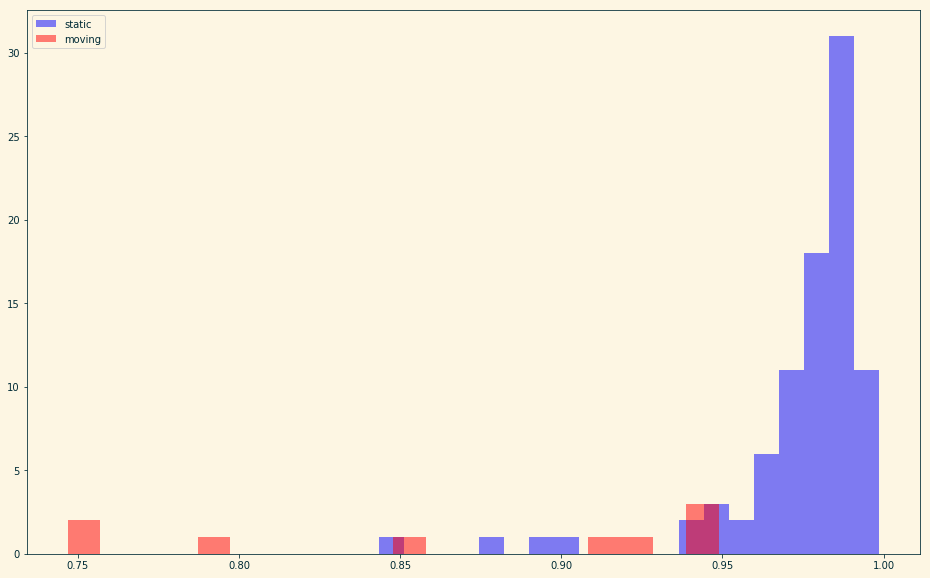

In [195]:
ax1 = plt.subplot(111)
vid_labels[vid_labels['moving']==0]['ssim'].hist(ax=ax1, color='blue', label='static', alpha=0.5, bins=20)
vid_labels[vid_labels['moving']==1]['ssim'].hist(ax=ax1, color='red', label='moving', alpha=0.5, bins=20)
_ = ax1.legend(loc='best')

In [201]:
vid_labels[vid_labels['ssim'] < 0.95]

,vid,moving,ssim
6,s_01_e_11_shot_017367_017441,0.0,0.900561
21,s_02_e_11_shot_008415_008489,1.0,0.847900
25,s_02_e_14_shot_023305_023379,0.0,0.843327
26,s_02_e_15_shot_003113_003187,1.0,0.753910
39,s_03_e_09_shot_034034_034108,1.0,0.795923
40,s_03_e_11_shot_011374_011448,0.0,0.890431
42,s_03_e_16_shot_034648_034722,1.0,0.942063
58,s_04_e_14_shot_023602_023676,0.0,0.878535
60,s_04_e_15_shot_039048_039122,1.0,0.948786
65,s_04_e_22_shot_021109_021183,0.0,0.949551


In [205]:
complete_ds.get_video('s_06_e_01_shot_009097_009171').display_gif()

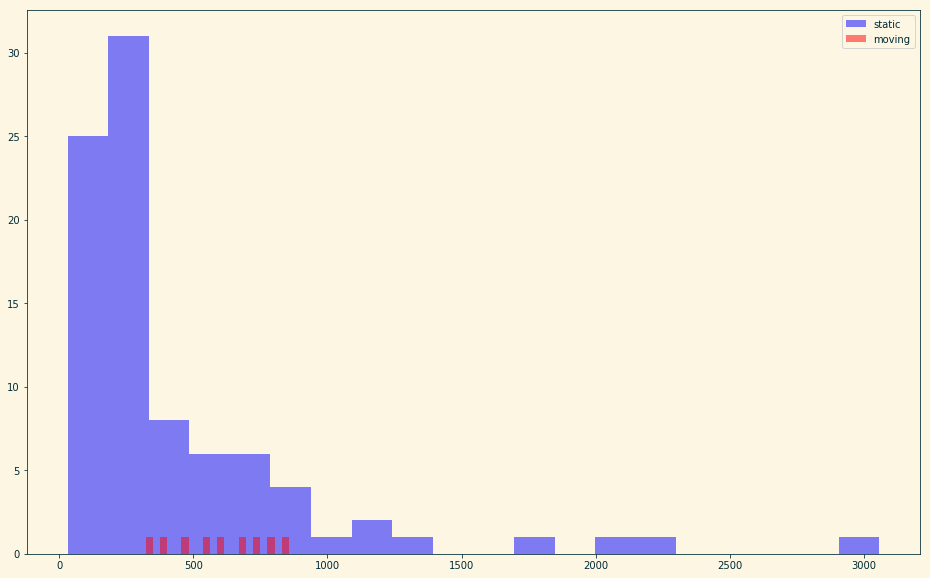

In [121]:
ax1 = plt.subplot(111)
vid_labels[vid_labels['moving']==0]['ssim'].hist(ax=ax1, color='blue', label='static', alpha=0.5, bins=20) 
vid_labels[vid_labels['moving']==1]['ssim'].hist(ax=ax1, color='red', label='moving', alpha=0.5, bins=20)
_ = ax1.legend(loc='best')

In [219]:
precision, recall, thresholds = precision_recall_curve(~vid_labels['moving'].astype(np.bool), vid_labels['ssim'])

In [226]:
classifier_res = pd.DataFrame([precision, recall, thresholds]).T

In [228]:
thresholds

array([0.8433268 , 0.84789977, 0.87853517, 0.89043079, 0.90056057,
       0.91496366, 0.92535515, 0.93934269, 0.94206347, 0.94264807,
       0.94359517, 0.94878579, 0.94955098, 0.95063594, 0.95076221,
       0.95273444, 0.95352195, 0.96114309, 0.96163104, 0.96335806,
       0.96463777, 0.96528644, 0.96698034, 0.96860615, 0.96894526,
       0.9689687 , 0.96975068, 0.97080486, 0.97086216, 0.97122612,
       0.97134609, 0.97253768, 0.97438152, 0.97497975, 0.97604357,
       0.97664387, 0.97675988, 0.97766562, 0.97780071, 0.97788147,
       0.97790313, 0.97812144, 0.97883901, 0.97972508, 0.98001   ,
       0.98003424, 0.98009535, 0.98113051, 0.98145089, 0.98164379,
       0.98266978, 0.9829134 , 0.98378227, 0.98386091, 0.98409744,
       0.98446612, 0.98449562, 0.98488457, 0.98497139, 0.98507785,
       0.98571912, 0.9858561 , 0.98630323, 0.98674095, 0.98680622,
       0.98685481, 0.98698127, 0.98703748, 0.98798881, 0.98802691,
       0.98814175, 0.98820269, 0.98825147, 0.98855351, 0.98872

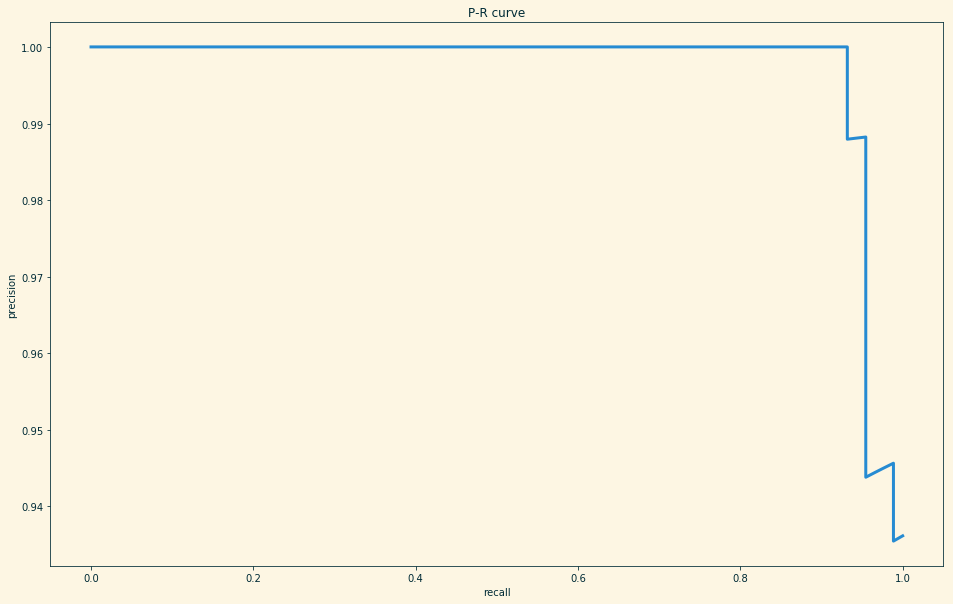

In [220]:
_ = plt.plot(recall, precision, lw=3)
plt.xlabel('recall')
plt.ylabel('precision')
_ = plt.title('P-R curve')

In [221]:
auc(recall, precision)

0.9971164934028502

# all ds results

In [8]:
class_res = unpickle_this('movement_classifications.pkl')

In [46]:
all_bg_res = pd.DataFrame([list(val.items())[0] for val in class_res])

In [50]:
all_bg_res.columns = ['vid', 'ssim']

In [55]:
all_bg_res = all_bg_res[all_bg_res['ssim'] < 10]

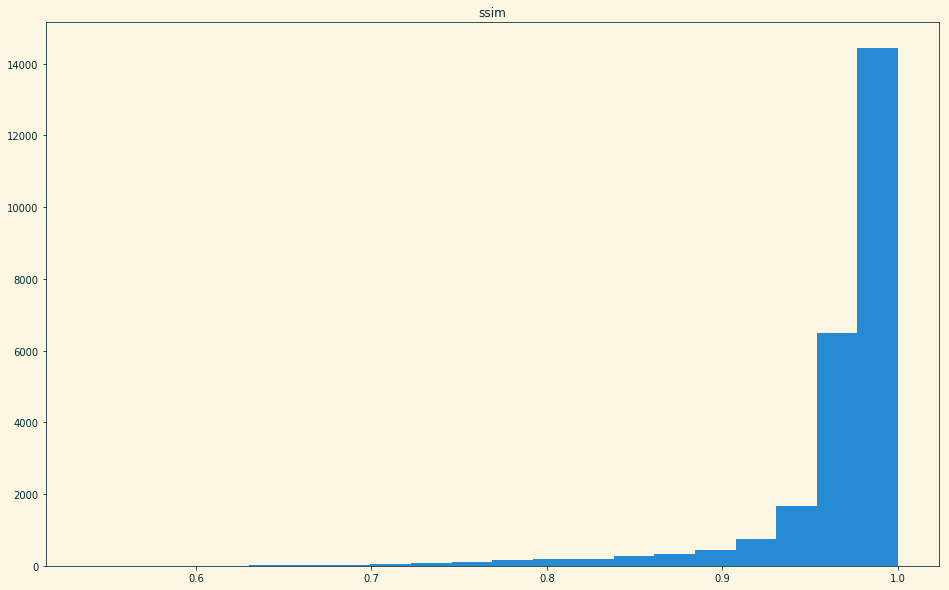

In [56]:
_ = all_bg_res.hist(bins=20)

In [57]:
moving_bg_vids = all_bg_res[all_bg_res['ssim'] < .95]

In [221]:
static_bg_vids = all_bg_res[all_bg_res['ssim'] >= .95]

In [224]:
static_bg_vids.shape + 

moving_bg_vids.shape

25228

In [77]:
test_vid = moving_bg_vids.iloc[900]
test_vid['ssim']

0.8893170300972523

In [78]:
complete_ds.get_video(test_vid['vid']).display_gif()

In [225]:
pickle_this(set(static_bg_vids['vid'].tolist()), 'static_vids.pkl')

# redo viz

In [1]:
import os

In [64]:
trajectories_dir = '/Users/schwenk/wrk/animation_gan/dataset/release/flintstones_dataset/'
tracking_dir = 'entity_tracking'
tracking_dir = 'new_tracking'
viz_dir = 'doc_viz'

frame_arr_dir =  trajectories_dir + 'video_frames'

def draw_video(video):
    outfile = os.path.join(viz_dir, video['globalID'] + '.gif')
    frame_arr_data = np.load(os.path.join(trajectories_dir, frame_arr_dir, video['globalID'] + '.npy'))
    interp_img_seq = [pil.fromarray(frame_arr_data[frame_n]).convert('P', dither=None, palette=pil.ADAPTIVE) for frame_n in range(frame_arr_data.shape[0])]
    interp_img_seq[0].save(outfile, save_all=True, optimize=False, duration=42, append_images=interp_img_seq[1:])
    return

def combine_frames(frame_images):
    widths, heights = zip(*(img.size for img in frame_images))
    total_width, max_height = sum(widths), max(heights)
    combined_img = pil.new('RGB', (total_width, max_height))
    x_offset = 0
    for im in frame_images:
        combined_img.paste(im, (x_offset, 0))
        x_offset += im.size[0]
    return combined_img

def draw_keyframes(video):
    outfile = os.path.join(viz_dir, video['globalID'] + '_keyframe.png')
    frame_arr_data = np.load(os.path.join(trajectories_dir, frame_arr_dir, video['globalID'] + '.npy'))
    keyframes = [pil.fromarray(frame_arr_data[frame_n]).convert('P', dither=None, palette=pil.ADAPTIVE) for frame_n in [10, 40, 70]]
    keyframe_comb = combine_frames(keyframes)
    keyframe_comb.save(outfile)

In [3]:
def draw_all_bboxes(frame_arr_square, raw_bboxes, entity_type='character'):
    color_assignments = {
        'character': (0, 255, 255),
        'object': (0, 255, 0),
    }
    frame_arr = cv2.resize(frame_arr_square, None, fx=asp_ratio, fy=1)
    bboxes = copy.deepcopy([bb.reshape(2, 2) for bb in raw_bboxes])
    for bb in bboxes:
        bb[:, 0] = bb[:, 0] * scale_down * asp_ratio
        bb[:, 1] = bb[:, 1] * scale_down * asp_ratio
    bboxes = [bb.astype(int) for bb in bboxes]
    _ = [cv2.rectangle(frame_arr, tuple(bb[0]), tuple(bb[1]), color_assignments[entity_type], thickness=1) for bb in
         bboxes]
    return pil.fromarray(frame_arr).convert('P', dither=None, palette=pil.ADAPTIVE)

In [4]:
def display_gif():
    gif_url = self.properties['s3_gif_base'] + + '.gif'
    if url_only:
        return gif_url
    return Image(url=gif_url)

In [44]:
def draw_all_bboxes(frame_arr_square, raw_bboxes, ent_type):
    color_assignments = {
        'characters': (0, 255, 255),
        'objects': (0, 255, 0),
    }
    frame_arr = frame_arr_square # cv2.resize(frame_arr_square, None, fx=asp_ratio, fy=1)
    bboxes = copy.deepcopy([bb.reshape(2, 2) for bb in raw_bboxes])
    for bb in bboxes:
        bb[:, 0] = bb[:, 0] 
        bb[:, 1] = bb[:, 1]
    bboxes = [bb.astype(int) for bb in bboxes]
    _ = [cv2.rectangle(frame_arr, tuple(bb[0]), tuple(bb[1]), color_assignments[ent_type], thickness=1) for bb in
         bboxes]
#     return pil.fromarray(frame_arr).convert('P', dither=None, palette=pil.ADAPTIVE)

In [45]:
# def draw_video_tracking(video):
#     outfile = os.path.join(viz_dir, video['globalID'] + '_tracking.gif')
#     all_eids = [ent['globalID'] for ent in video['characters'] + video['objects']]
#     entity_interps = [np.load(os.path.join(trajectories_dir, tracking_dir, eid + '.npy')) for eid in all_eids]
#     frame_arr_data = np.load(os.path.join(trajectories_dir, frame_arr_dir, video['globalID'] + '.npy'))
#     interp_img_seq = [draw_all_bboxes(frame_arr_data[frame_n], [entity_rect[frame_n] for entity_rect in entity_interps],
#                                       'objects') for frame_n in range(frame_arr_data.shape[0])]
#     interp_img_seq[0].save(outfile, save_all=True, optimize=True, duration=42, append_images=interp_img_seq[1:])
#     return

In [65]:
def draw_video_tracking(video):
    outfile = os.path.join(viz_dir, video['globalID'] + '_tracking.gif')
    all_eids = {'characters': [ent['globalID'] for ent in video['characters']]}
    all_eids['objects'] = [ent['globalID'] for ent in video['objects']]
    entity_interps = {ent_type: [np.load(os.path.join(trajectories_dir, tracking_dir, eid + '.npy')) for eid in eids] for ent_type , eids in all_eids.items()}
    frame_arr_data = np.load(os.path.join(trajectories_dir, frame_arr_dir, video['globalID'] + '.npy'))
    for ent_type, ents in entity_interps.items():
        for ent in ents:
            [draw_all_bboxes(frame_arr_data[frame_n], [entity_rect[frame_n] for entity_rect in ents], ent_type) for frame_n in range(frame_arr_data.shape[0])]
    interp_img_seq = [pil.fromarray(frame_arr).convert('P', dither=None, palette=pil.ADAPTIVE) for frame_arr in frame_arr_data]
    interp_img_seq[0].save(outfile, save_all=True, optimize=True, duration=42, append_images=interp_img_seq[1:])
    return

In [67]:
draw_video_tracking(sample_ds[0])

In [ ]:
draw_video(sample_ds[0])

In [79]:
draw_keyframes(sample_ds[0])

# make pages

In [23]:
from anigen_tools.release_docs import doc_video_group

In [13]:
with open('../build_dataset/first_sample_ids.txt', 'r') as f:
    sample_ids = [l.strip() for l in f.readlines()]

with open('/Users/schwenk/wrk/animation_gan/dataset/release/flintstones_annotations_v1-0.json') as f:
    complete_ds = json.load(f)

sample_ds = [vid for vid in complete_ds if vid['globalID'] in sample_ids]

In [24]:
doc_video_group(sample_ds[:5], make_images=True, vids_per_page=2)

In [ ]:
# doc_video_group(complete_ds.data[:15000], vids_per_page=10)